# Introduction
Sprocket Central Pty Ltd is a company that sells bikes. I am going to explore this dataset and identify customer trends and behavior.
- Step 1: Data Cleansing
- Step 2: Data Exploration and visualizations
- Step 3: Build models

### Exported the manipulated dataset into a new csv file called KPMG_new_data.csv

Goal: target customers between age 18 - 50 (born between 2002 to 1970)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime

In [31]:
xls = pd.ExcelFile('/Users/dennie/Desktop/KPMG virtual internship/KPMG_VI_New_raw_data_update_final.xlsx')
df0 = pd.read_excel(xls, 'Transactions')
df1 = pd.read_excel(xls, 'NewCustomerList')
df2 = pd.read_excel(xls, 'CustomerDemographic')
df3 = pd.read_excel(xls, 'CustomerAddress')

In [32]:
df0.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [33]:

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


## Data Cleansing

In [34]:
df1 = df1.columns.map(lambda x: x.strip())

In [35]:
#features_drop = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
#df1.drop(features_drop)

In [36]:
#### Join the CustomerDemographic and Transactions
#### Let's take a look at Transaction among different Demographics
#left or inner join df2 and df0 on customer_id
data = pd.merge(df0,df2,how='inner',on='customer_id')
#data = df0.merge(df2, on='customer_id', how='left')

In [37]:
# Left join data and CustomerAddress
# Add customer's address into current table, which is data
data = pd.merge(data,df3,how='inner',on='customer_id')

In [38]:
data['default'].tail()

19963                 -100
19964    ãã¼ãã£ã¼ã¸è¡ããªãã
19965    ãã¼ãã£ã¼ã¸è¡ããªãã
19966                  NaN
19967                  NaN
Name: default, dtype: object

In [39]:
# Drop default column because we have no idea what that column does
# Drop the tenure column because it's probably not very useful and we don't know what the numbers mean
data_drop = ['default','tenure']
data = data.drop(data_drop,axis=1)

In [40]:
# 1 = Yes; 0 = No
data['online_order'].value_counts()

1.0    9818
0.0    9791
Name: online_order, dtype: int64

In [41]:
#data.drop(data[data['online_order']==0].index,inplace=True)

In [42]:
# Combine the first_name and last_name
data['name']=data['first_name']+' '+data['last_name']

In [43]:
last_first_name=['first_name','last_name']
data = data.drop(last_first_name,axis=1)

In [44]:
data['DOB'].min()

Timestamp('1843-12-21 00:00:00')

In [45]:
data['Year'] = data['DOB'].dt.year

In [46]:
#the oldest customer is 177 year old...
data['Year'].min()

1843.0

In [47]:
2020-79

1941

In [48]:
#According to Google, the average human lifespan is 79 year old.
#It makes more sense to target customers who are more likely are still alive
#Remove the customers with age over 79.
data.drop(data[data['Year']<1941].index,inplace=True)

In [49]:
#job_title and job_industry_category have a lot of missing values
#these two can help us to target customers because what job the customers do can tell whether they need a bike or not
#But, due to data quality issue, missing value exists, which might eventually affect the final outcome
data.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   194
product_line                            194
product_class                           194
product_size                            194
list_price                                0
standard_cost                           194
product_first_sold_date                 194
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2376
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
address                                   0
postcode                        

In [50]:
#drop the rows with missing job_title and job_industry_category
data.dropna(subset = ["job_title"], inplace=True)
data.dropna(subset = ["job_industry_category"], inplace=True)


In [51]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation,name,Year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,984 Hoepker Court,3064,VIC,Australia,6,Kristos Anthony,1955.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,Yes,984 Hoepker Court,3064,VIC,Australia,6,Kristos Anthony,1955.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,984 Hoepker Court,3064,VIC,Australia,6,Kristos Anthony,1955.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,Yes,4 Shopko Circle,2196,NSW,Australia,5,Lauree O'Donnell,1979.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,Yes,4 Shopko Circle,2196,NSW,Australia,5,Lauree O'Donnell,1979.0


### A new dataset is created - new_data

In [52]:
#Build a new DataFrame called New_data with customers between 18 to 50 year old
new_data=data[(data['Year']>1970) & (data['Year']<2002)]

In [53]:
new_data.to_csv('KPMG_new_data.csv',index=False)

In [54]:
new_data.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                           168
order_status                             0
brand                                   99
product_line                            99
product_class                           99
product_size                            99
list_price                               0
standard_cost                           99
product_first_sold_date                 99
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
address                                  0
postcode                                 0
state      

In [55]:
drop = ['Year','transaction_id','product_id','customer_id','name']
new_data = new_data.drop(drop,axis=1)

In [56]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10203 entries, 3 to 19965
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     10203 non-null  datetime64[ns]
 1   online_order                         10035 non-null  float64       
 2   order_status                         10203 non-null  object        
 3   brand                                10104 non-null  object        
 4   product_line                         10104 non-null  object        
 5   product_class                        10104 non-null  object        
 6   product_size                         10104 non-null  object        
 7   list_price                           10203 non-null  float64       
 8   standard_cost                        10104 non-null  float64       
 9   product_first_sold_date              10104 non-null  float64       
 10  gender    

In [57]:
new_data[new_data.index.duplicated()]

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation


In [58]:
new_data.describe()

,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,postcode,property_valuation
count,10035.000000,10203.000000,10104.000000,10104.000000,10203.000000,10203.000000,10203.000000
mean,0.501545,1108.163378,557.809863,38197.512569,50.088405,3005.011075,7.441439
std,0.500023,581.577621,406.813848,2874.739674,28.739844,867.046782,2.843699
min,0.000000,12.010000,7.210000,33259.000000,0.000000,2000.000000,1.000000
25%,0.000000,575.270000,215.140000,35560.000000,26.000000,2203.000000,6.000000
50%,1.000000,1151.960000,486.150000,38216.000000,49.000000,2763.000000,8.000000
75%,1.000000,1635.300000,795.100000,40672.000000,75.000000,3806.000000,10.000000
max,1.000000,2091.470000,1759.850000,42710.000000,99.000000,4883.000000,12.000000


## Explore the new_data features

In [59]:
new_data['online_order'].value_counts()

1.0    5033
0.0    5002
Name: online_order, dtype: int64

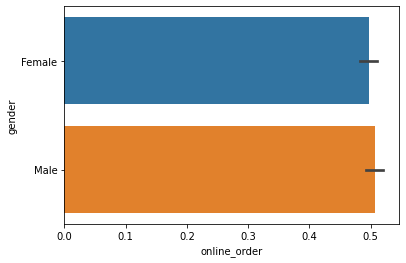

In [60]:
sns.barplot(x='online_order',y='gender',data=new_data)

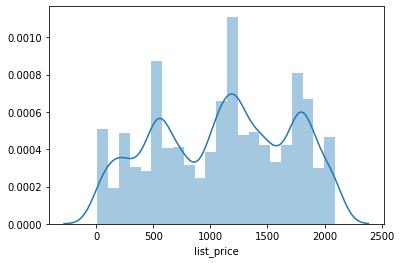

In [61]:
sns.distplot(new_data['list_price'])

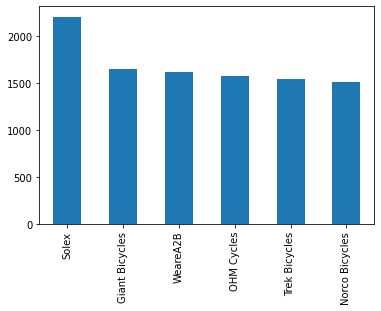

In [62]:
new_data['brand'].value_counts().plot(kind='bar')

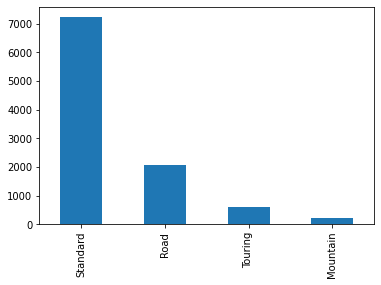

In [63]:
new_data['product_line'].value_counts().plot(kind='bar')

In [64]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10203 entries, 3 to 19965
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     10203 non-null  datetime64[ns]
 1   online_order                         10035 non-null  float64       
 2   order_status                         10203 non-null  object        
 3   brand                                10104 non-null  object        
 4   product_line                         10104 non-null  object        
 5   product_class                        10104 non-null  object        
 6   product_size                         10104 non-null  object        
 7   list_price                           10203 non-null  float64       
 8   standard_cost                        10104 non-null  float64       
 9   product_first_sold_date              10104 non-null  float64       
 10  gender    

### Who is more likely to buy a bike?
- Female or Male
- owns a car or don't
> etc....

In [65]:
new_data['owns_car'].value_counts()

Yes    5104
No     5099
Name: owns_car, dtype: int64

In [66]:
# Female who owns a car and still buys a bike
sum((new_data['order_status']=='Approved')&(new_data['owns_car']=='Yes') & (new_data['gender']=='Female'))

2654

In [67]:
# Male who owns a car and still buys a bike
sum((new_data['order_status']=='Approved')
    &(new_data['owns_car']=='Yes') 
    & (new_data['gender']=='Male'))

2403

In [68]:
new_data['order_status'].value_counts()

Approved     10100
Cancelled      103
Name: order_status, dtype: int64

#### Visualize customer's location

In [69]:
new_data['state'].value_counts()

NSW                5260
QLD                2323
VIC                2178
New South Wales     239
Victoria            203
Name: state, dtype: int64

In [70]:
# VIC and Victoria are the same location
# replace VIC with Victoria
new_data['state']=new_data['state'].replace('VIC','Victoria')

In [71]:
# need to remove this column for privacy issue
# we don't need the specific location of customers' home in order to preceed the analysis
new_data['address'].value_counts()

8142 Tomscot Drive       14
9427 Tennyson Plaza      13
9 Sugar Junction         13
259 Barnett Crossing     13
3126 Butterfield Pass    13
                         ..
50 Claremont Junction     1
8 Hoffman Alley           1
0108 Forster Parkway      1
0 Thompson Road           1
390 Wayridge Plaza        1
Name: address, Length: 1794, dtype: int64

In [72]:
new_data['country'].value_counts()

Australia    10203
Name: country, dtype: int64

In [73]:
map_data = df.loc[:,["Date","State","Value"]]
map_data1 = df.loc[:,["State","Value"]]
map_data=map_data.groupby(["Date","State"])[["Value"]].sum().reset_index()
map_data1=map_data.groupby(["State"])[["Value"]].sum().reset_index()

NameError: name 'df' is not defined

In [ ]:
cdf=map_data
cdf["transaction_date"] = cdf["transaction_date"].astype(str)
fig = px.choropleth(cdf, locations=cdf["state"],       

 color=cdf["list_price"],
                    locationmode="Australia",
                    scope='australia',
                    animation_frame=cdf["transaction_date"],

                    color_continuous_scale='Reds',
                    hover_data = [cdf.count],
                   )

fig.show()

### Cost

In [ ]:
gbb =  new_data.groupby("brand")[["standard_cost"]].sum().reset_index()
fig = px.pie(gbb,
             values="standard_cost",
             names="brand",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [ ]:
gbb1 =  new_data.groupby("product_line")[["standard_cost"]].sum().reset_index()
fig = px.pie(gbb1,
             values="standard_cost",
             names="product_line",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [ ]:
gbb1 =  new_data.groupby("product_line")[["list_price"]].sum().reset_index()
fig = px.pie(gbb1,
             values="list_price",
             names="product_line",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [ ]:
#total list_price for each date
gbdt = new_data.groupby("transaction_date")[["list_price"]].sum().reset_index()
gbdt = gbdt.tail(24)

fig = px.bar(gbdt[['transaction_date', 'list_price']], 
             y="list_price", x="transaction_date", color='transaction_date', 
             log_y=True)
fig.show()

In [ ]:
#CustomerAddress
df3.isnull().sum()